In [10]:
import numpy as np
from scipy.interpolate import approximate_taylor_polynomial
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
from ts1 import taylor_series_expansion

def construct_hamiltonian(N, x, dx, h_bar, mass, q):
    potential =  (mass * x**2 * q**2)/2
    potential = np.diag(potential)

    hamiltonian = np.zeros((N, N))
    
    finite_diff = -2 * np.eye(N)
    finite_diff += np.eye(N, k=1)
    finite_diff += np.eye(N, k=-1)
    
    kinetic = -h_bar**2 / (2 * mass * dx**2) * finite_diff
    
    hamiltonian = kinetic + potential#*np.eye(N)

    return hamiltonian

def time_evolution(hamiltonian, time, mass, h_bar):
    te_operator = np.exp((-1j * hamiltonian * time)/h_bar)
    #final_teo = taylor_series_expansion(hamiltonian, 2, time)
    #te_operator = taylor_series_expansion(te_operator, 4)
    #taylor = approximate_taylor_polynomial(te_operator, 0, degree = 4, scale = 1)
    return te_operator

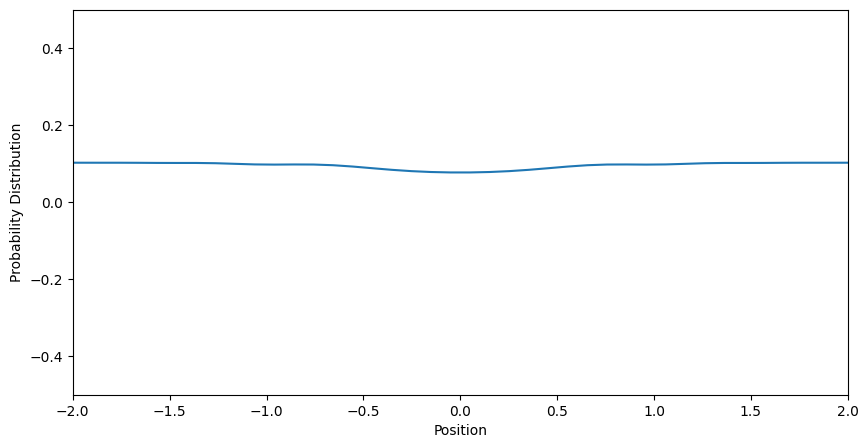

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

In [15]:
x_min = -5.0
x_max = 5.0
N = 100

# Create the grid
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define the physical parameters
mass = 1
h_bar = 1#.05457e-35
q = np.pi#10

hamiltonian = construct_hamiltonian(N, x, dx, h_bar, mass, q)

eigval, eigvec = np.linalg.eigh(hamiltonian)

#initial_wavefunction = eigvec[:, 0]

initial_state = eigvec.T


t = 0
t_max = 1
t_steps = 500
t_values = np.linspace(t, t_max, t_steps)
dt = t_values[1] - t_values[0]
count = 0

all_states = np.zeros((t_steps, N))
#all_real_states = np.zeros((t_steps, N))
#all_img_states = np.zeros((t_steps, N))

fig, ax = plt.subplots(figsize=(10, 5))


while t <= t_max:

    if t == 0:
        final_state = initial_state
        all_states[count, :] = final_state[0]
        final_state /= np.linalg.norm(final_state)
    
    else:

        teo = time_evolution(hamiltonian, t, mass, h_bar)
        new_state = np.dot(teo, eigvec)
        final_state = new_state.T
        #final_state = final_state_complex/(np.sqrt(np.dot(final_state_complex, np.conj(final_state_complex))*dx))

        all_states[count, :] = final_state[0]
        final_state[0] /= np.linalg.norm(final_state[0])

    #plt.plot(x,(initial_state[0]/np.linalg.norm(initial_state[0]))**2)
    plt.plot(x,(final_state[0]))
    # plt.ylim([-0.1, 0.1])
    plt.xlim([-2, 2])
    plt.ylim([-0.5,0.5])

    plt.xlabel("Position")
    plt.ylabel("Probability Distribution")
    clear_output(wait=True)  
    display(fig) 
    fig.clear() 
    #time.sleep(10)

    t += dt
    count += 1



plt.tight_layout()
plt.show
#print(all_states)
#plt.imshow(all_states)

Text(0, 0.5, 'Probability Distribution')

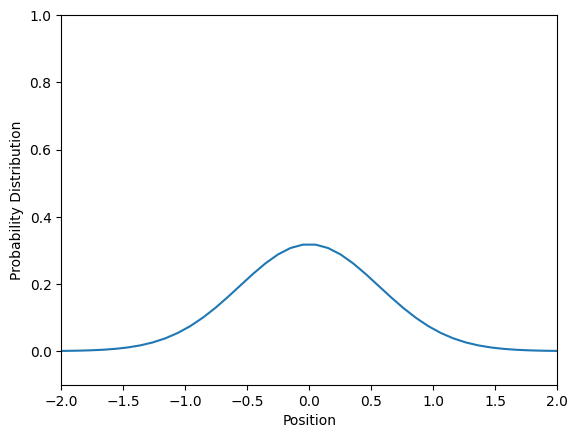

In [111]:
#plt.subplot(1,2,1)
plt.plot(x,initial_state[0]/np.linalg.norm(initial_state[0]))
plt.ylim([-0.1, 1])
plt.xlim([-2, 2])
plt.xlabel("Position")
plt.ylabel("Probability Distribution")
#print(teo*teo)